<a href="https://colab.research.google.com/github/Mohamed2bdelaziz/Covid-19-classification-with-pattern-recognition/blob/main/Main_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# load the data in a ziped file using kaggle api command
! kaggle datasets download -d meirnizri/covid19-dataset

Dataset URL: https://www.kaggle.com/datasets/meirnizri/covid19-dataset
License(s): CC0-1.0
covid19-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [64]:
# unziping loaded zip file
! unzip /content/covid19-dataset.zip

Archive:  /content/covid19-dataset.zip
replace Covid Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [65]:
# read data from the csv file using pandas
data_path = '/content/Covid Data.csv' # here's the data path
df = pd.read_csv(data_path) # load the data into a DataFrame

# showing random 8 samples from the data
df.sample(8)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
16640,1,3,1,1,9999-99-99,97,1,35,2,2,...,2,2,2,2,2,2,2,2,7,97
963511,1,12,2,1,9999-99-99,97,2,50,97,2,...,2,2,2,2,2,2,2,2,7,97
418930,2,9,1,1,9999-99-99,97,2,25,2,2,...,2,2,2,2,2,2,2,2,7,97
442118,2,11,2,2,9999-99-99,2,2,41,97,2,...,2,2,2,2,2,2,2,2,3,2
502576,2,12,2,1,9999-99-99,97,2,27,97,2,...,2,2,2,2,2,2,2,2,3,97
712310,1,12,1,1,9999-99-99,97,2,35,2,2,...,2,2,2,2,2,2,2,2,6,97
441358,2,11,1,1,9999-99-99,97,2,45,2,2,...,2,2,2,2,2,2,2,2,3,97
390137,2,8,2,1,9999-99-99,97,2,48,97,2,...,2,2,2,2,2,2,2,2,7,97


In [66]:
df.shape

(1048575, 21)

## Check duplicate values

In [67]:
def print_unique(df):
    for i in df.columns:
        print(f'Column {i} has {df[i].nunique()} unique values')
print_unique(df)

Column USMER has 2 unique values
Column MEDICAL_UNIT has 13 unique values
Column SEX has 2 unique values
Column PATIENT_TYPE has 2 unique values
Column DATE_DIED has 401 unique values
Column INTUBED has 4 unique values
Column PNEUMONIA has 3 unique values
Column AGE has 121 unique values
Column PREGNANT has 4 unique values
Column DIABETES has 3 unique values
Column COPD has 3 unique values
Column ASTHMA has 3 unique values
Column INMSUPR has 3 unique values
Column HIPERTENSION has 3 unique values
Column OTHER_DISEASE has 3 unique values
Column CARDIOVASCULAR has 3 unique values
Column OBESITY has 3 unique values
Column RENAL_CHRONIC has 3 unique values
Column TOBACCO has 3 unique values
Column CLASIFFICATION_FINAL has 7 unique values
Column ICU has 4 unique values


In [68]:
# select the columns that contain nan values
nan_columns = df.columns[df.isin([97,99]).any()]
nan_columns

Index(['INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'ICU'], dtype='object')

In [69]:
'''
Kmean
one-hot-encoding
normalizer, standard, etc
PCA
'''

'\nKmean\none-hot-encoding\nnormalizer, standard, etc\nPCA\n'

In [70]:
def SOLVE(df):
    for col in ['INTUBED', 'PNEUMONIA', 'PREGNANT', 'ICU']:
        df[col].replace({97: 1 , 99 : 2},inplace=True)
    df.loc[:,'CLASIFFICATION_FINAL'].replace({1 : 1, 2 : 1, 3 : 1, 4 : 0 , 5 : 0 , 6 : 0 , 7 : 0},inplace=True)
    df["DEAD"] = (df["DATE_DIED"] == "9999-99-99").astype(int)
    df.drop(columns=["DATE_DIED"], inplace=True)
    df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
    df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
    df = df[(df.COPD == 1) | (df.COPD == 2)]
    df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
    df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
    df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
    df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
    df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
    df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
    df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
    df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

    df.drop_duplicates(inplace=True)

    # df.drop(columns=["INTUBED",'PREGNANT'],inplace=True)
    return df

In [71]:
df_solved = SOLVE(df.copy())

In [72]:
df_solved.shape

(172549, 21)

In [73]:
df_solved.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD'],
      dtype='object')

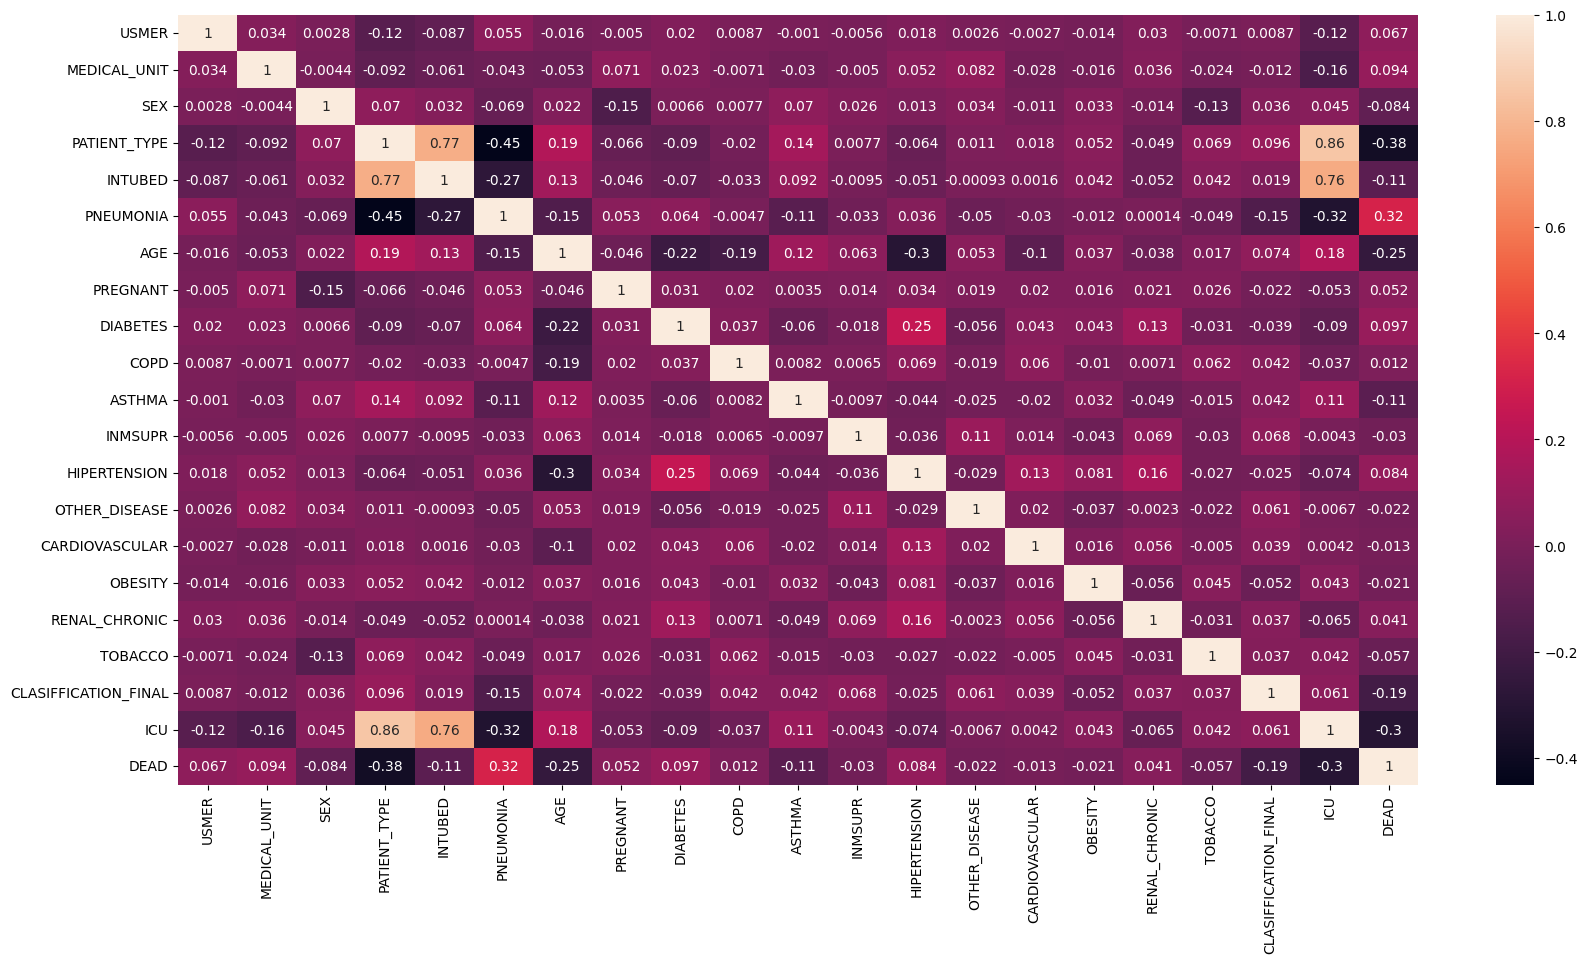

In [74]:
plt.figure(figsize=(20,10))
sns.heatmap(df_solved.corr(),annot=True)
plt.show()

In [75]:
features = ['PATIENT_TYPE','ICU','PNEUMONIA','AGE','ASTHMA','CLASIFFICATION_FINAL','DEAD']
df_solved[features].nunique()

PATIENT_TYPE              2
ICU                       2
PNEUMONIA                 2
AGE                     121
ASTHMA                    2
CLASIFFICATION_FINAL      2
DEAD                      2
dtype: int64

In [76]:
df_solved.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,1,1,65,2,2,2,...,2,1,2,2,2,2,2,1,1,0
1,2,1,2,1,1,1,72,1,2,2,...,2,1,2,2,1,1,2,0,1,0
2,2,1,2,2,1,2,55,1,1,2,...,2,2,2,2,2,2,2,1,2,0
3,2,1,1,1,1,2,53,2,2,2,...,2,2,2,2,2,2,2,0,1,0
4,2,1,2,1,1,2,68,1,1,2,...,2,1,2,2,2,2,2,1,1,0


In [77]:
X = df_solved.drop(columns = ['DEAD']).values
y = df_solved.DEAD.values#.reshape(-1, 1)

In [78]:
# Min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_solved = scaler.fit_transform(X)

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [80]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((138039, 20), (34510, 20), (138039,), (34510,))

## Feature selection (PSO).

1. Define the Problem and Objective Function
>The objective function could be the performance metric of a machine learning model (e.g., accuracy, F1-score) using a subset of features.

In [81]:
# Objective function
def objective_function(
    selected_features : list[bool],
    X = X_train, y = y_train,
    X_test = X_test, y_test = y_test
    ) -> float:
    if np.sum(selected_features) == 0:
        return 0  # Avoid empty feature subset
    X_selected = X[:, selected_features == 1]
    clf = GradientBoostingClassifier(n_estimators = 30, learning_rate=0.01)
    clf.fit(X_selected, y)
    y_pred = clf.predict(X_test[:, selected_features == 1])
    return accuracy_score(y_test, y_pred)

In [82]:
objective_function(np.ones(X_train.shape[1]))

0.7361344537815127

2. Encode Particles
> Each particle represents a subset of features. This can be encoded as a binary vector where 1 means the feature is selected and 0 means it is not.

3. Initialize Particles
> Initialize particle positions (binary vectors) and velocities (continuous values).

4. Evaluate Fitness
> Evaluate the fitness of each particle by training and validating a machine learning model using the selected features.

In [83]:
# Parameters
num_particles = 6
dimensions = X_train.shape[1]
max_iter = 10
c1 = 2.0
c2 = 2.0
w = 0.7
w_decay = 0.99

# Initialize particle positions and velocities
particles_position = np.random.randint(2, size=(num_particles, dimensions))
particles_velocity = np.random.uniform(low=-1, high=1, size=(num_particles, dimensions))
pBest_position = np.copy(particles_position)
pBest_value = np.array([objective_function(p) for p in tqdm(particles_position)])
gBest_position = pBest_position[np.argmax(pBest_value)]
gBest_value = np.max(pBest_value)


100%|██████████| 6/6 [00:17<00:00,  2.97s/it]


In [84]:
print(f"Best selected features vector: {particles_position[np.argmax(pBest_value)]}")
print(f"Accuracy of best selected features vector: {gBest_value :0.3f}")

Best selected features vector: [0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0]
Accuracy of best selected features vector: 0.736


5. Update Velocities and Positions
> Update velocities and positions using PSO equations. Use a sigmoid function to convert continuous velocities into binary positions.

6. Update Personal and Global Bests
> Update the personal best positions and the global best position based on the fitness evaluations.

7. Iterate
> Repeat the update steps until the stopping criterion is met.

8. Return the Best Feature Subset
> Return the best feature subset found during the iterations.

In [85]:
# PSO main loop
for t in range(max_iter):
    for i in tqdm(range(num_particles)):
        # Update velocities
        r1 = np.random.rand(dimensions)
        r2 = np.random.rand(dimensions)
        particles_velocity[i] = (
            w * particles_velocity[i] +
            c1 * r1 * (pBest_position[i] - particles_position[i]) +
            c2 * r2 * (gBest_position - particles_position[i])
        )

        # Update positions using sigmoid function
        sigmoid = 1 / (1 + np.exp(-particles_velocity[i]))
        particles_position[i] = np.where(np.random.rand(dimensions) < sigmoid, 1, 0)

        # Evaluate fitness
        fitness = objective_function(particles_position[i])

        # Update personal best
        if fitness > pBest_value[i]:
            pBest_position[i] = particles_position[i]
            pBest_value[i] = fitness

    # Update global best
    if np.max(pBest_value) > gBest_value:
        gBest_position = pBest_position[np.argmax(pBest_value)]
        gBest_value = np.max(pBest_value)

    # Decay inertia weight
    w *= w_decay

    # Print progress
    print(f"Iteration {t+1}/{max_iter}, Global Best Value: {gBest_value:0.3f}")


100%|██████████| 6/6 [00:16<00:00,  2.81s/it]


Iteration 1/10, Global Best Value: 0.736


100%|██████████| 6/6 [00:15<00:00,  2.67s/it]


Iteration 2/10, Global Best Value: 0.736


100%|██████████| 6/6 [00:15<00:00,  2.60s/it]


Iteration 3/10, Global Best Value: 0.736


100%|██████████| 6/6 [00:18<00:00,  3.04s/it]


Iteration 4/10, Global Best Value: 0.736


100%|██████████| 6/6 [00:17<00:00,  2.94s/it]


Iteration 5/10, Global Best Value: 0.736


100%|██████████| 6/6 [00:18<00:00,  3.08s/it]


Iteration 6/10, Global Best Value: 0.736


100%|██████████| 6/6 [00:16<00:00,  2.72s/it]


Iteration 7/10, Global Best Value: 0.736


100%|██████████| 6/6 [00:16<00:00,  2.72s/it]


Iteration 8/10, Global Best Value: 0.736


100%|██████████| 6/6 [00:15<00:00,  2.66s/it]


Iteration 9/10, Global Best Value: 0.736


100%|██████████| 6/6 [00:16<00:00,  2.73s/it]

Iteration 10/10, Global Best Value: 0.736


In [86]:
# Results
print("Best feature subset:", gBest_position)
print("Best accuracy:", gBest_value)

Best feature subset: [0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0]
Best accuracy: 0.7361344537815127


In [87]:
covid_df = df.copy()

In [88]:
covid_df = SOLVE(covid_df)

In [89]:
selected_cols = covid_df.drop(columns = ['DEAD']).columns[np.array(gBest_position).astype(bool)]

print("Selected columns are:", *selected_cols.values, sep="\n")

not_selected_cols = covid_df.drop(columns = ['DEAD']).columns[~np.array(gBest_position).astype(bool)]
print("\nNot selected columns are:", *not_selected_cols.values, sep="\n")

Selected columns are:
SEX
PATIENT_TYPE
INTUBED
PNEUMONIA
AGE
PREGNANT
COPD
HIPERTENSION
CARDIOVASCULAR

Not selected columns are:
USMER
MEDICAL_UNIT
DIABETES
ASTHMA
INMSUPR
OTHER_DISEASE
OBESITY
RENAL_CHRONIC
TOBACCO
CLASIFFICATION_FINAL
ICU


In [90]:
X_train = X_train[:,np.array(gBest_position).astype(np.bool_)]
X_test = X_test[:,np.array(gBest_position).astype(np.bool_)]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((138039, 9), (34510, 9), (138039,), (34510,))

## To implement Linear Discriminant Analysis (LDA) from scratch, we need to follow these steps:

1. Compute the mean vectors for each class.
2. Compute the within-class scatter matrix.
3. Compute the between-class scatter matrix.
4. Compute the eigenvectors and eigenvalues of the matrix (S_w^-1 * S_b).
5. Choose the k eigenvectors that correspond to the k largest eigenvalues to form the projection matrix W.
6. Project the samples onto the new feature subspace.

### Linear Discriminant Analysis (LDA) Equations:

#### Within-Class Scatter Matrix:
\[ S_W = sum_{c=1}^{C} sum_{i=1}^{n_c} (x_i^c - m_c)(x_i^c - m_c)^T \]
where:
- \( c \) is the class label.
- \( n_c \) is the number of samples in class \( c \).
- \( x_i^c \) is the \( i \)-th sample in class \( c \).
- \( m_c \) is the mean vector of class \( c \) samples.

#### Between-Class Scatter Matrix:
\[ S_B = \sum_{c=1}^{C} n_c (m_c - m)(m_c - m)^T \]
where:
- \( m \) is the overall mean vector of all samples.

#### Solving Eigenvalue Problem:
\[ S_W^{-1} S_B w = \lambda w \]
where:
- \( w \) is the eigenvector corresponding to the largest eigenvalue \( \lambda \).

In [91]:
class LinearDiscriminantAnalysis:
    def __init__(self):
        self.W = None

    def fit(self, X, y, k=5):
        # Compute class means
        self.class_means = {}
        for c in np.unique(y):
            self.class_means[c] = np.mean(X[y == c], axis=0)

        # Compute within-class scatter matrix
        self.S_w = np.zeros((X.shape[1], X.shape[1]))
        for c in self.class_means.keys():
            class_scatter = np.zeros((X.shape[1], X.shape[1]))
            for x in X[y == c]:
                x, mean = x.reshape(-1, 1), self.class_means[c].reshape(-1, 1)
                class_scatter += (x - mean).dot((x - mean).T)
            self.S_w += class_scatter

        # Compute between-class scatter matrix
        overall_mean = np.mean(X, axis=0).reshape(-1, 1)
        self.S_b = np.zeros((X.shape[1], X.shape[1]))
        for c in self.class_means.keys():
            n = X[y == c].shape[0]
            class_mean = self.class_means[c].reshape(-1, 1)
            self.S_b += n * (class_mean - overall_mean).dot((class_mean - overall_mean).T)

        # Compute eigenvalues and eigenvectors of (S_w^-1 * S_b)
        eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(self.S_w).dot(self.S_b))

        # Choose k eigenvectors corresponding to k largest eigenvalues
        self.W = eig_vecs[:, np.argsort(eig_vals)[::-1][:k]]

    def transform(self, X):
        # Transform data using LDA and return only the real part
        return np.real(np.dot(X, self.W))

In [92]:
# Apply LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

print(X_train_lda.shape)

(138039, 5)


In [93]:
# Feature selection using Random Forest feature importance
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_lda, y_train)

# Predict the labels
y_pred_knn = knn.predict(X_test_lda)

In [94]:
# Evaluate the performance
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Classification Report:\n', classification_report(y_test, y_pred_knn))

Accuracy: 0.7552593451173573
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.45      0.49      9106
           1       0.81      0.87      0.84     25404

    accuracy                           0.76     34510
   macro avg       0.68      0.66      0.66     34510
weighted avg       0.74      0.76      0.75     34510



In [95]:
# logistic
model4 = LogisticRegression(random_state=42)
model4.fit(X_train_lda,y_train)
y_pred4 = model4.predict(X_test_lda)

accuracy4 = accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy4}")

print('Classification Report:\n', classification_report(y_test, y_pred4))

Accuracy: 0.794986960301362
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.37      0.49      9106
           1       0.81      0.95      0.87     25404

    accuracy                           0.79     34510
   macro avg       0.76      0.66      0.68     34510
weighted avg       0.78      0.79      0.77     34510



In [96]:
# randomforest
model1 = RandomForestClassifier(n_estimators = 200,random_state=42)
model1.fit(X_train_lda,y_train)
y_pred1 = model1.predict(X_test_lda)

accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy1}")

print('Classification Report:\n', classification_report(y_test, y_pred1))

Accuracy: 0.7877426832802087
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.39      0.49      9106
           1       0.81      0.93      0.87     25404

    accuracy                           0.79     34510
   macro avg       0.74      0.66      0.68     34510
weighted avg       0.77      0.79      0.77     34510



In [97]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train_lda,y_train)
y_pred3 = model3.predict(X_test_lda)

accuracy3 = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy3}")

print('Classification Report:\n', classification_report(y_test, y_pred3))

Accuracy: 0.7944074181396696
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.38      0.49      9106
           1       0.81      0.94      0.87     25404

    accuracy                           0.79     34510
   macro avg       0.76      0.66      0.68     34510
weighted avg       0.78      0.79      0.77     34510



In [98]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=42)
model4.fit(X_train_lda,y_train)
y_pred4 = model4.predict(X_test_lda)

accuracy4 = accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy4}")

print('Classification Report:\n', classification_report(y_test, y_pred4))

Accuracy: 0.7958562735439003
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.37      0.49      9106
           1       0.81      0.95      0.87     25404

    accuracy                           0.80     34510
   macro avg       0.76      0.66      0.68     34510
weighted avg       0.78      0.80      0.77     34510

